In [1]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../object-repair_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['chunk_n'] == 1:
        return "Kademlia"
    else:
        cache = int(r['cache_sec']) // 3600
        return f"Entropy-{cache}"

data['Protocol'] = data.apply(classify, axis=1)
data = data[data['churn_rate'] >= 1.]
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,Protocol
0,4,100000,1,0,1,1,1,625,200,4294967295,0,0,0,1.225000e+01,Kademlia
1,4,100000,1,0,10,1,1,625,200,4294967295,0,0,0,1.246250e+02,Kademlia
2,4,100000,1,0,10,1,1,625,200,4294967295,0,0,0,1.268350e+02,Kademlia
3,4,100000,1,0,1,1,1,625,200,4294967295,0,0,0,1.241000e+01,Kademlia
4,4,100000,1,0,10,1,1,625,200,4294967295,0,0,0,1.249250e+02,Kademlia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,4,100000,1,0,1000,100,80,500,200,21600,0,0,0,6.433298e+05,Entropy-6
236,4,100000,1,0,1000,100,80,500,200,172800,0,0,0,1.251079e+04,Entropy-48
237,4,100000,1,0,1000,100,80,500,200,21600,0,0,0,6.436138e+05,Entropy-6
238,4,100000,1,0,1000,100,80,500,200,21600,0,0,0,6.439360e+05,Entropy-6


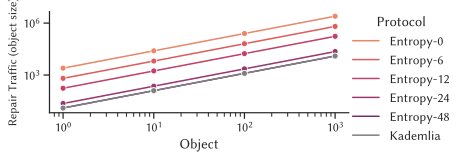

In [3]:
palette = sns.color_palette('flare', n_colors=5)
sns.relplot(data=data, 
    kind="line",
    x="object_count", y="repair", hue="Protocol", 
    hue_order=["Entropy-0", "Entropy-6", "Entropy-12", "Entropy-24", "Entropy-48", "Kademlia"],
    marker="o", palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Object") \
.set_ylabels("Repair Traffic (object size)", fontdict={"size": "small"}) \
.set(xscale="log", yscale="log")